Read in the stock twits data  file line by line. Each line is a json string.

In [103]:
import requests
req=requests.get("http://www.ams.jhu.edu/~dan/stock_twits/twits.txt")
txt=req.text
txt.count("\n")

726

In [104]:
S=txt.split("\n")
len(S)

727

Each entry in S is a json string. Make a list of objects. 

In [105]:
import json
for i in range(len(S)):
    print(i)
    obj=json.loads(S[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

The above error occured because of the trailing empty element.

In [106]:
T=[json.loads(S[i]) for i in range(len(S)-1)]

Every element in T is a dictionary with 4 keys.

In [107]:
type(T[2])

dict

In [108]:
T[2].keys()

dict_keys(['symbol', 'cursor', 'messages', 'response'])

Check that all of the elements of L that are lists of length 30.

In [109]:
[x for x in L if len(x)!=30]

[]

For now, let's ignore everything except the messages and also store the symbol
that was used to get those messages. (This uses nested list comprehension.)

In [110]:
L=[T[k]['messages'] for k in range(len(T))]

Note that L is a list of lists. We want to make a list of all messages.

Make one big list out of all of these 30 x len(L) messages.

In [111]:
M=[x for y in L for x in y ]
len(M)

21780

In [112]:
SYMBOL=[T[k]['symbol']['symbol'] for k in range(len(T)) for j in range(30)]
print(SYMBOL)

['SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'SPX', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'DJIA', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'QQQ', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL', '

Every message has an id number. Check that we don't get the same id multiple times.

In [113]:
IDnumbers=set([x['id'] for x in M])

How many times does each id appear?

In [114]:
IDcount={}
for id in IDnumbers:
    S=[x for x in M if x['id']==id]
    IDcount[str(id)]=len(S)

In [115]:
k=IDcount.keys()
[IDcount[x] for x in list(k)[0:25]]

[1, 6, 7, 7, 4, 6, 7, 7, 1, 1, 1, 50, 7, 6, 7, 7, 7, 6, 1, 17, 7, 7, 7, 3, 14]

So it appears we have lots of twits appearing multiple times in our list. We want to reduce the list to unique twits. So we make a dictionary of locations of
each id, then we can extract just the first occurence.

In [116]:
IDloc={}
for k in range(len(M)):
    id=str(M[k]['id'])
    if id in IDloc.keys():
        IDloc[id].append(k)
    else:
        IDloc[id]=[k]

In [17]:
[(x,IDloc[x]) for x in list(IDloc.keys())[0:25]]

[('151262507', [0, 3309]),
 ('151262494', [1, 62, 92, 390, 3310, 3396, 3693]),
 ('151262450', [2, 3311]),
 ('151262401', [3, 3312]),
 ('151261239', [4, 30, 3313, 3335]),
 ('151261212', [5, 31, 98, 394, 3314, 3336, 3402, 3697]),
 ('151261166',
  [6,
   32,
   99,
   127,
   187,
   302,
   462,
   993,
   1681,
   3315,
   3337,
   3403,
   3431,
   3492,
   3603,
   3769,
   4296,
   4981]),
 ('151260859', [7, 3316]),
 ('151260740', [8, 33, 3317, 3338]),
 ('151260672', [9, 34, 3318, 3339]),
 ('151260547', [10, 3319]),
 ('151259410', [11, 3320]),
 ('151259384', [12, 36, 3321, 3341]),
 ('151259281', [13, 3322]),
 ('151258861', [14, 37, 140, 228, 3323, 3342, 3444]),
 ('151258689', [15, 113, 192, 3324, 3417, 3497]),
 ('151258257',
  [16, 193, 995, 1226, 1620, 2640, 2853, 3325, 3498, 4298, 4920, 5940, 6153]),
 ('151258036', [17, 38, 114, 3326, 3343, 3418]),
 ('151257738', [18, 149, 195, 3327, 3500]),
 ('151257725', [19, 39, 115, 3328, 3344, 3419]),
 ('151257075', [20, 3329]),
 ('151256970',

In [117]:
P=[M[IDloc[id][0]] for id in IDloc]
S=[SYMBOL[IDloc[id][0]] for id in IDloc]

In [118]:
len(S)

3419

Now we have a bunch of unique stock twit messages. What does one of these look like?

In [119]:
P[0].keys()

dict_keys(['mentioned_users', 'symbols', 'id', 'created_at', 'conversation', 'body', 'source', 'entities', 'user'])

In [120]:
P[0]

{'mentioned_users': ['@JIMRO'],
 'symbols': [{'is_following': False,
   'watchlist_count': 37180,
   'id': 679,
   'aliases': [],
   'symbol': 'SPX',
   'title': 'S&P 500 Index'},
  {'is_following': False,
   'watchlist_count': 4631,
   'id': 8677,
   'aliases': [],
   'symbol': 'STUDY',
   'title': 'StockTwits Education'}],
 'id': 151262507,
 'created_at': '2019-01-21T18:18:17Z',
 'conversation': {'in_reply_to_message_id': 151260672,
  'parent': False,
  'replies': 2,
  'parent_message_id': 151260672},
 'body': '@JIMRO Seasonal data along w/ many came into the year Bearish, now expects a retest lower needs to happen, It could rip $SPX $STUDY',
 'source': {'url': 'https://stocktwits.com',
  'id': 2269,
  'title': 'StockTwits Web'},
 'entities': {'sentiment': None,
  'chart': {'url': 'https://charts.stocktwits.com/production/original_151262507.png',
   'large': 'https://charts.stocktwits.com/production/large_151262507.png',
   'original': 'https://charts.stocktwits.com/production/origin

In [121]:
P[0]['symbols'][0]

{'is_following': False,
 'watchlist_count': 37180,
 'id': 679,
 'aliases': [],
 'symbol': 'SPX',
 'title': 'S&P 500 Index'}

In [122]:
sorted([P[k]['user']['followers'] for k in range(len(P))])

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [123]:
P[0]['user']['followers']

48

Exercise: Note that some twits have unicode characters represented using the pattern

    &#xxxx;
    
where xxxx is a decimal value.  We want to conver these all to unicode characters in the strings. How can we do this?

Is there something about twit users who have lots of followers? 

Is there a relationship between number of followers and numbers following?

In [124]:
followers=[P[k]['user']['followers'] for k in range(len(P))]
following=[P[k]['user']['following'] for k in range(len(P))]

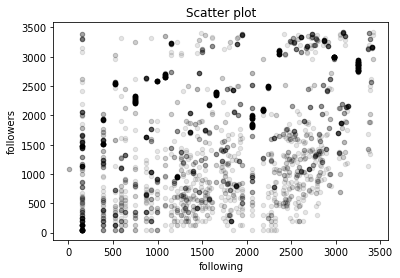

In [125]:
from scipy.stats import rankdata
import matplotlib.pyplot as plt
rfollowers=rankdata(followers)
rfollowing=rankdata(following)
%matplotlib inline 
# Plot
plt.scatter(rfollowing, rfollowers,alpha=.1,s=20,color='black')
plt.title('Scatter plot')
plt.xlabel('following')
plt.ylabel('followers')
plt.show()

In [126]:
import numpy as np
np.corrcoef(rfollowers,rfollowing)

array([[1.        , 0.44757531],
       [0.44757531, 1.        ]])

In [127]:
P[1]

{'mentioned_users': [],
 'symbols': [{'is_following': False,
   'watchlist_count': 37180,
   'id': 679,
   'aliases': [],
   'symbol': 'SPX',
   'title': 'S&P 500 Index'},
  {'is_following': False,
   'watchlist_count': 9166,
   'id': 4979,
   'aliases': [],
   'symbol': 'DIA',
   'title': 'SPDR Dow Jones Industrial Average'},
  {'is_following': False,
   'watchlist_count': 111224,
   'id': 7271,
   'aliases': [],
   'symbol': 'SPY',
   'title': 'SPDR S&P 500'},
  {'is_following': False,
   'watchlist_count': 7662,
   'id': 8233,
   'aliases': [],
   'symbol': 'TQQQ',
   'title': 'ProShares UltraPro QQQ'},
  {'is_following': False,
   'watchlist_count': 38026,
   'id': 9581,
   'aliases': ['QQQQ'],
   'symbol': 'QQQ',
   'title': 'PowerShares Nasdaq-100 QQQ'}],
 'id': 151262494,
 'created_at': '2019-01-21T18:17:53Z',
 'body': 'IMF trimmed global growth amid &quot;no-deal&quot; Brexit and trade war concerns $SPX, $SPY, $DIA, $QQQ, $TQQQ bullish news 300 point rally',
 'source': {'url': 

How many twits provide sentiment?

In [128]:
Sentiments=[P[k]['entities']['sentiment'] for k in range(len(P))]

In [129]:
Sent=[x['basic'] for x in Sentiments if x!=None and 'basic' in x]

In [130]:
len([s for s in Sent if s=="Bearish"])

253

In [131]:
len([s for s in Sent if s=="Bullish"])

614

Want to determine whether we can predict Bullish vs. Bearishness based on the words in the body of the twit, how many stocks are mentioned in the twit, and other features, such as whether a user has a lot of follows, or follows alot of users. Let's create some functions to extract features we want including the sentiment value and only include twits with sentiment.

In [132]:
def sentiment(p):
    q=p['entities']['sentiment']
    if q==None:
        return(None)
    else:
        if 'basic' in q:
            return(q['basic'])
        else:
            return(None)
    

In [133]:
print([sentiment(p) for p in P][0:25])

[None, None, None, None, None, None, 'Bearish', 'Bullish', None, None, 'Bearish', None, None, 'Bearish', 'Bullish', None, None, 'Bearish', None, 'Bearish', None, None, None, None, None]


In [134]:
P=[p for p in P if sentiment(p)!=None]
len(P)

867

Randomly set aside 1/3 of the data for testing and use 2/3 for training.

In [145]:
import numpy as np
N=len(P)
Itest=list(np.random.choice(range(N), int(N/3)))
Itrain=[i for i in range(N) if i not in Itest]
Ptrain=[P[i] for i in Itrain]
Ptest=[P[i] for i in Itest]

Function to count how many tickers appear in the body. 

Function to list all symbols mentioned.

In [146]:
def listofsymbols(p):
    E=p['symbols']
    symbols=[x['symbol'] for x in E]
    return(symbols)
listofsymbols(Ptrain[2])

['DJIA', 'SPX', 'AAPL', 'AMZN', 'EA', 'TSLA']

In [147]:
def nsymbols(p):
    return(len(listofsymbols(p)))

In [148]:
print([nsymbols(p) for p in Ptrain][0:25])

[11, 1, 6, 5, 5, 8, 1, 2, 10, 3, 4, 1, 2, 1, 2, 1, 1, 3, 5, 2, 2, 4, 5, 4, 5]


Extract all entities that look like words from body. Also, leave out words that have the word "bull" or "bear" in them.

In [151]:
import re
import nltk
def wordlist(p):
    body=p['body']
    symbols=listofsymbols(p)
    #
    # remove every symbol - note that the list doesn't include the $ symbol.
    # so we need to add it to our expression to substitute.
    # we also need to escape it since it has special meaning as a pattern.
    #
    for s in symbols:
        s=r"\$" + s
        body=re.sub(s," ",body)
    #
    # remove all expressions of the form &xxx; 
    #
    p=r"&\w*;"
    body=re.sub(p," ",body)
    #
    # remove all non alphabetic characters
    #
    p=r"\W"
    body=re.sub(p," ",body)
    #
    # split on the space characters
    #
    wordlist=body.split()
    #
    # remove any word that has "bear" or "bull" in it
    #
    wordlist=[w for w in wordlist if not re.search("bear",w)]
    wordlist=[w for w in wordlist if not re.search("bull",w)] 
    #
    # remove words with numbers in them
    #
    wordlist=[w for w in wordlist if not re.search("\d",w)]
    #
    # remove duplicates
    #
    wordlist=list(set(wordlist))
    return(wordlist)

In [153]:
wordlist(Ptrain[0])

['the',
 'propping',
 'vix',
 'https',
 'youtu',
 'Banks',
 'Watch',
 'stock',
 'be',
 'spx',
 'fb',
 'amd',
 'are',
 'Central',
 'nvda',
 'Global',
 'spy',
 'ba',
 'djia',
 'aapl',
 'qqq',
 'gs',
 'market']

Make list of wordlists one for each twit in the training set and list for each twit in the test set.

In [163]:
twit_wordlists_train=[wordlist(p) for p in Ptrain]
twit_wordlists_test=[wordlist(p) for p in Ptest]

Make a list of all words appearing in any twit in the training set.

In [166]:
WORDS_TRAIN=[twit_wordlists_train[k] for k in range(len(Ptrain))]
WORDS_TRAIN=[w for k in range(len(WORDS_TRAIN)) for w in WORDS_TRAIN[k]]
WORDS_TRAIN=list(set(WORDS_TRAIN))

In [167]:
len(WORDS_TRAIN)

2591

In [168]:
len(Ptrain)

629

Make an array with features as columns - feature being presence of word in twit.
Each row is a twit. And make a column of indicators of bullish.

Do the same with the test set but note we aren't allowed to look at the test dataset words to create features, so we use the word list from the training set.

In [1]:
import numpy as np
Xtrain=np.zeros((len(Ptrain),len(WORDS_TRAIN)))
Ytrain=np.zeros(len(Ptrain))
for i in range(len(Ptrain)):
    p=Ptrain[i]
    # list of words for the i-th twit
    wlist=twit_wordlists_train[i] 
    for j in range(len(WORDS_TRAIN)):
        w=WORDS_TRAIN[j]
        if w in wlist:
            Xtrain[i,j]=1
    if sentiment(p)=="Bullish":
        Ytrain[i]=1
Xtest=np.zeros((len(Ptest),len(WORDS_TRAIN)))
Ytest=np.zeros(len(Ptest))
for i in range(len(Ptest)):
    p=Ptest[i]
    # list of words for the i-th twit
    wlist=twit_wordlists_test[i] 
    for j in range(len(WORDS_TRAIN)):
        w=WORDS_TRAIN[j]
        if w in wlist:
            Xtest[i,j]=1
    if sentiment(p)=="Bullish":
        Ytest[i]=1

NameError: name 'Ptrain' is not defined

In [231]:
print(Xtest.shape)
print(Xtrain.shape)
print(Ytest.shape)
print(Ytrain.shape)

(289, 2591)
(629, 2591)
(289,)
(629,)


Do chi-square test of word presense in twit vs bullish for each word.

In [233]:
import sklearn.feature_selection
chi2=sklearn.feature_selection.chi2(Xtrain, Y)
pvalues=chi2[1]

Which words give the lowest p-values?

In [234]:
sorted([(pvalues[k],WORDS_TRAIN[k]) for k in range(len(WORDS_TRAIN)) if pvalues[k]<.01])

[(6.161491438736798e-05, 'pump'),
 (7.427794568367032e-05, 'Calls'),
 (0.0002078047531564281, 'lower'),
 (0.0003093240741106041, 'down'),
 (0.0006092141461779312, 'Up'),
 (0.0007088227762440259, 'too'),
 (0.0008923748043075856, 'on'),
 (0.0014496200625652073, 'puts'),
 (0.002247728656438885, 'Tuesday'),
 (0.002456418400890237, 'Resis'),
 (0.002456418400890237, 'SELL'),
 (0.002456418400890237, 'Supp'),
 (0.002456418400890237, 'TD'),
 (0.002456418400890237, 'economic'),
 (0.002456418400890237, 'miss'),
 (0.002456418400890237, 'red'),
 (0.002667078846425826, 'Jan'),
 (0.0032373500732302807, 'Update'),
 (0.0032373500732302807, 'alerted'),
 (0.004779636955896879, 'growth'),
 (0.006043090769587365, 'resistance'),
 (0.0063732828946118855, 'market'),
 (0.008718599272576172, 'Bulls'),
 (0.008718599272576172, 'Puts'),
 (0.008718599272576172, 'according'),
 (0.008718599272576172, 'bloody'),
 (0.008718599272576172, 'candle'),
 (0.008718599272576172, 'downtrend'),
 (0.008718599272576172, 'economy')

In [235]:
indices_of_kept_words=[k for k in range(len(WORDS_TRAIN)) if pvalues[k]<.01]
words_kept=[WORDS_TRAIN[i] for i in indices_of_kept_words]
Xtrain=Xtrain[:,indices_of_kept_words]
Xtest=Xtest[:,indices_of_kept_words]

In [239]:
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(629, 33)
(289, 33)
(629,)
(289,)


Build a naive Bayes classifier using these features.

In [240]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(Xtrain, Ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Predict for the test set.

In [248]:
Ypred=clf.predict_proba(Xtest)

In [242]:
len(Ytest)

289

In [250]:
Ypred

array([[3.03656598e-01, 6.96343402e-01],
       [3.03656598e-01, 6.96343402e-01],
       [6.24678663e-01, 3.75321337e-01],
       [5.16233458e-05, 9.99948377e-01],
       [1.23803102e-01, 8.76196898e-01],
       [3.03656598e-01, 6.96343402e-01],
       [3.03656598e-01, 6.96343402e-01],
       [3.03656598e-01, 6.96343402e-01],
       [3.03656598e-01, 6.96343402e-01],
       [8.46394984e-02, 9.15360502e-01],
       [3.03656598e-01, 6.96343402e-01],
       [3.03656598e-01, 6.96343402e-01],
       [3.03656598e-01, 6.96343402e-01],
       [1.02219893e-03, 9.98977801e-01],
       [3.03656598e-01, 6.96343402e-01],
       [3.03656598e-01, 6.96343402e-01],
       [3.03656598e-01, 6.96343402e-01],
       [3.03656598e-01, 6.96343402e-01],
       [3.50350679e-01, 6.49649321e-01],
       [3.03656598e-01, 6.96343402e-01],
       [6.91376904e-06, 9.99993086e-01],
       [6.24678663e-01, 3.75321337e-01],
       [3.03656598e-01, 6.96343402e-01],
       [3.03656598e-01, 6.96343402e-01],
       [3.036565

In [258]:
def confusion_matrix(Ytrue,Ypred,threshold):
    M=np.zeros((2,2))
    n=len(Ytrue)
    M[0,0]=len([k for k in range(n) if Ytrue[k]==0 and Ypred[k][1]<=threshold])
    M[0,1]=len([k for k in range(n) if Ytrue[k]==0 and Ypred[k][1]>threshold])
    M[1,0]=len([k for k in range(n) if Ytrue[k]==1 and Ypred[k][1]<=threshold])
    M[1,1]=len([k for k in range(n) if Ytrue[k]==1 and Ypred[k][1]>threshold])
    return(M)
    

In [281]:
confusion_matrix(Ytest,Ypred,.68)

array([[ 23.,  48.],
       [ 25., 193.]])

Logistic Regression

In [282]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(Xtrain,Ytrain)
Ypred=clf.predict_proba(Xtest)

In [284]:
confusion_matrix(Ytest,Ypred,.7)

array([[ 24.,  47.],
       [ 25., 193.]])

Decision tree

In [288]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xtrain, Ytrain)
Ypred=clf.predict_proba(Xtest)
confusion_matrix(Ytest,Ypred,.5)

array([[ 23.,  48.],
       [ 21., 197.]])

In [ ]:
Random Forest

In [289]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [291]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=3,random_state=0)
clf.fit(Xtrain, Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [295]:
Ypred=clf.predict_proba(Xtest)

In [302]:
confusion_matrix(Ytest,Ypred,.7)

array([[ 22.,  49.],
       [ 25., 193.]])